In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print(torch.__version__)

cuda
1.12.1


In [2]:
model, preprocess = clip.load("ViT-B/32", device=device) #모델과 전처리기를 load함



In [3]:
impath = "test7.png"

image = preprocess(Image.open(impath)).unsqueeze(0).to(device)


template = 'the image of {}'

prompts = ['putting something', 'walking', 'throwing someting', 'dumping something', 'holding something']

text = clip.tokenize([template.format(x) for x in prompts]).to(device) #내가 비교하고 싶은 텍스트를 tokenize 함
#Returns a LongTensor containing tokenized sequences of given text input(s). This can be used as the input to the model

with torch.no_grad():
    image_features = model.encode_image(image) #이미지 feature를 뽑아내서 인코딩
    text_features = model.encode_text(text) #텍스트 feature를 뽑아내서 인고딩
    
    logits_per_image, logits_per_text = model(image, text) 
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(type(probs))
probabilities = probs.flatten().tolist()
print(probabilities)
print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

<class 'numpy.ndarray'>
[0.1153564453125, 0.08843994140625, 0.0870361328125, 0.69580078125, 0.0135650634765625]
Label probs: [[0.11536  0.08844  0.08704  0.696    0.013565]]


C:\Users\user\AppData\Local\Temp\ipykernel_27336\573008817.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.set_yticks([])


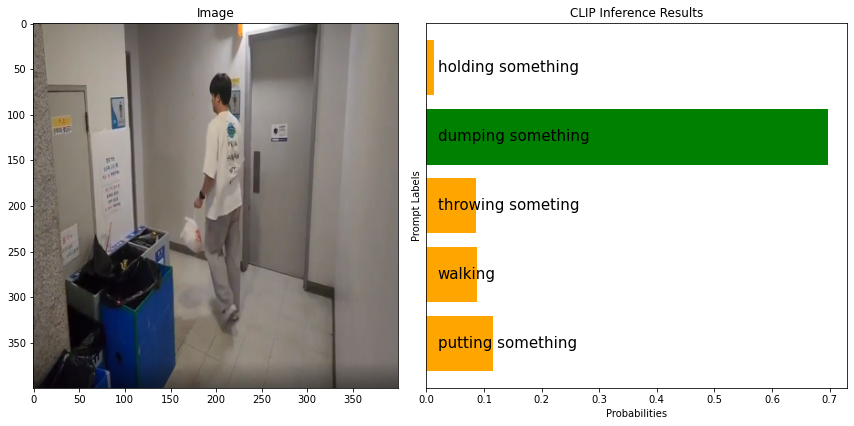

In [17]:
plt.figure(figsize= (12,6))
ax1 = plt.subplot(1 , 2, 2)
ax2 = plt.subplot(1 , 2, 1)

max_value = max(probabilities)
max_index = probabilities.index(max_value)

bars = ax1.barh(prompts, probabilities, color='orange', align='edge')
ax1.set_ylabel('Prompt Labels')
ax1.set_xlabel('Probabilities')
ax1.set_title('CLIP Inference Results')
ax1.set_yticks([])
bars[max_index].set_color('green')

for bar, prom in zip(ax1.patches, prompts[::]):
    ax1.text(0.02 ,bar.get_y()+bar.get_height()/2, prom, color = 'black', ha = 'left', va = 'center', fontsize=15) 


ax2.imshow(Image.open(impath).resize((400,400)))
ax2.set_title("Image")

plt.subplots_adjust(top=0.941,
bottom=0.097,
left=0.013,
right=0.988,
hspace=1.0,
wspace=0.0)
plt.show()